# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [45]:
# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import datetime as dt

In [46]:
# browser = Browser('chrome')
# Set the path to the chromedriver executable
chromedriver_path = '/Users/danieladamson/Downloads/chromedriver_mac64/chromedriver'

# Create a new service object
service = Service(chromedriver_path)

# Create a new Chrome driver object
driver = webdriver.Chrome(service=service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [47]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [48]:
# Create a Beautiful Soup Object
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [49]:
# Extract all rows of data
data_rows = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [50]:
# Create an empty list
row_list = []
# Loop through the scraped data to create a list of rows
for row in data_rows:
    values = []
    for cell in row.find_all('td'):
        values.append(cell.text.strip())
    row_list.append(values)  


In [51]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 
           'sol', 'ls', 
           'month', 'min_temp', 
           'pressure']
mars_df = pd.DataFrame(row_list, columns=column_names)

In [52]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [53]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [54]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [55]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [56]:
# 1. How many months are there on Mars?
months = mars_df['month'].nunique()
print("There are", months, "months on Mars.")

There are 12 months on Mars.


In [57]:
# 2. How many Martian days' worth of data are there?
sols = mars_df['sol'].nunique()
print("There are", sols, "Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [58]:
# 3. What is the average low temperature by month?
mean_low_temp = mars_df.groupby('month')['min_temp'].mean()

print(mean_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Avg Minimum Temperature by Month')

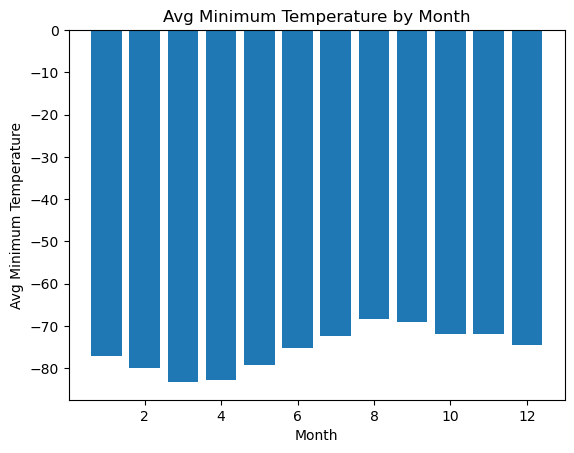

In [59]:
# Plot the average temperature by month
plt.bar(mean_low_temp.index, mean_low_temp.values, linewidth=1)
plt.xlabel('Month')
plt.ylabel('Avg Minimum Temperature')
plt.title('Avg Minimum Temperature by Month')

In [60]:
# sort list of months and temperatures to find lowest min_temp
mean_low_temp_sorted = mean_low_temp.sort_values()

#use idxmin to find lowest min_temp in sorted table
coldest_month = mean_low_temp_sorted.idxmin()

#print results and sorted table
print('Month', coldest_month, 'has the lowest minimum temperature (see bar plot above).')
print(' ')
print('Table sorted by temperature, in ascending order:')
print(mean_low_temp_sorted)


Month 3 has the lowest minimum temperature (see bar plot above).
 
Table sorted by temperature, in ascending order:
month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


In [61]:
# 4. Average pressure by Martian month
mean_pressure = mars_df.groupby('month')['pressure'].mean()

print(mean_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Avg Pressure by Month')

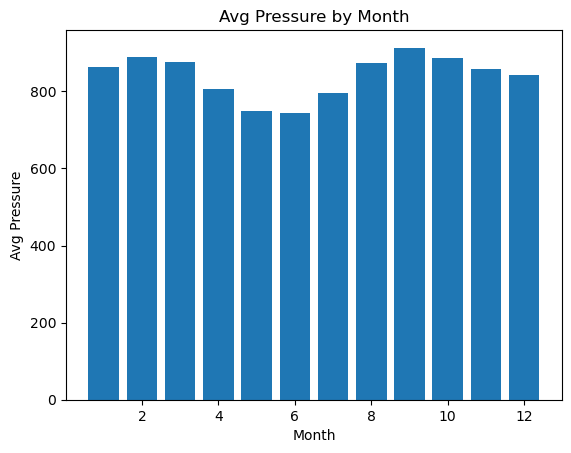

In [62]:
# Plot the average pressure by month
plt.bar(mean_pressure.index, mean_pressure.values, linewidth=1)
plt.xlabel('Month')
plt.ylabel('Avg Pressure')
plt.title('Avg Pressure by Month')

In [73]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Find first occurrence of row['ls']=0 for each Martian year
ls_0_dates = []
for index, row in mars_df.iterrows():
    # Check if this is the first row of a new terrestrial year
    if current_year != row['terrestrial_date'].year:
        current_year = row['terrestrial_date'].year
        year_started = False
        
    # Check if this is the first occurrence of row['ls']=0 for this year
    if row['ls'] == 0 and not year_started:
        ls_0_dates.append(row['terrestrial_date'].strftime('%Y-%m-%d'))
        year_started = True
        
    # Check if we've already found the first occurrence of row['ls']=0 for this year
    if year_started and row['ls'] == 0:
        continue
        
print(ls_0_dates)

#Subtract first two values of this list
year_length = (dt.datetime.strptime(ls_0_dates[1], '%Y-%m-%d') - dt.datetime.strptime(ls_0_dates[0], '%Y-%m-%d')).days
print("The length of a martian year is", year_length, "terrestrial days, judging by the solar latitude of Mars.")


['2013-08-01', '2015-06-19', '2017-05-06']
The length of a martian year is 687 terrestrial days, judging by the solar latitude of Mars.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [64]:
# Write the data to a CSV
mars_df.to_csv('exports/mars.csv', index=False)


In [65]:
# Quit Selenium webdriver
driver.quit()